IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

READING DATASET

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Assignment 4/spam.csv', delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


PRE-PROCESSING DATA

In [5]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

CREATING MODEL

In [6]:
inputs = Input(shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)

ADDING LAYERS

In [7]:
layer = LSTM(128)(layer)
layer = Dense(128)(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1.5)(layer)
layer = Activation('sigmoid')(layer)
model = Model(inputs=inputs,outputs=layer)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129   

COMPILE THE MODEL

In [9]:
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

FIT MODEL

In [10]:
history = model.fit(sequences_matrix,Y_train,batch_size=20,epochs=15,validation_split=0.2)

Epoch 1/15
168/168 [==============================] - 38s 190ms/step - loss: 0.1873 - accuracy: 0.9411 - val_loss: 0.0441 - val_accuracy: 0.9868
Epoch 2/15
168/168 [==============================] - 32s 191ms/step - loss: 0.0438 - accuracy: 0.9865 - val_loss: 0.0387 - val_accuracy: 0.9892
Epoch 3/15
168/168 [==============================] - 34s 201ms/step - loss: 0.0198 - accuracy: 0.9949 - val_loss: 0.0526 - val_accuracy: 0.9809
Epoch 4/15
168/168 [==============================] - 30s 180ms/step - loss: 0.0130 - accuracy: 0.9970 - val_loss: 0.0638 - val_accuracy: 0.9844
Epoch 5/15
168/168 [==============================] - 34s 205ms/step - loss: 0.0134 - accuracy: 0.9967 - val_loss: 0.0568 - val_accuracy: 0.9844
Epoch 6/15
168/168 [==============================] - 31s 182ms/step - loss: 0.0086 - accuracy: 0.9976 - val_loss: 0.0729 - val_accuracy: 0.9868
Epoch 7/15
168/168 [==============================] - 33s 194ms/step - loss: 0.0112 - accuracy: 0.9964 - val_loss: 0.0893 - val_ac

In [11]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
  metrics[[var1, var2]].plot()
  plt.title('Training and Validation ' + string)
  plt.xlabel ('Number of epochs')
  plt.ylabel(string)
  plt.legend([var1, var2])

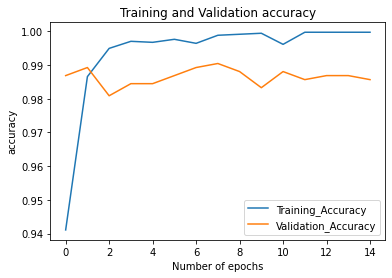

In [12]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

SAVE THE MODEL

In [13]:
model.save('Spam_sms_classifier.h5')

TEST THE MODEL

In [14]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [15]:
accuracy1 = model.evaluate(test_sequences_matrix,Y_test)


44/44 [==============================] - 3s 77ms/step - loss: 0.0732 - accuracy: 0.9871


In [16]:
print(' Accuracy: {:0.5f}'.format(accuracy1[0],accuracy1[1]))


 Accuracy: 0.07318


# New section